# 1. тасралтгүй шинж чанар бүхий санамсаргүй хувьсагч

Тасралтгүй санамсаргүй хувьсагч: санамсаргүй хувьсагчийн авч болох утга тасралтгүй шинж чанартай

## 1.1 Нэг хэмжээст тасралтгүй хувьсагч

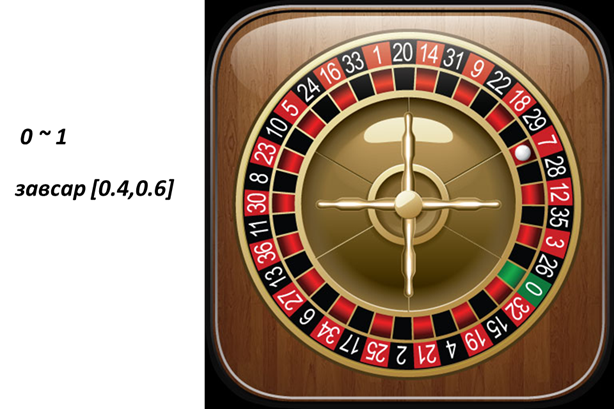

### 1.1.1  Нэг хэмжээст тасралтгүй хувьсагчийн тодорхойлолт

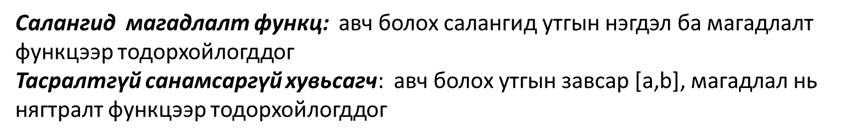

#### 1.1.1.1 probability density function

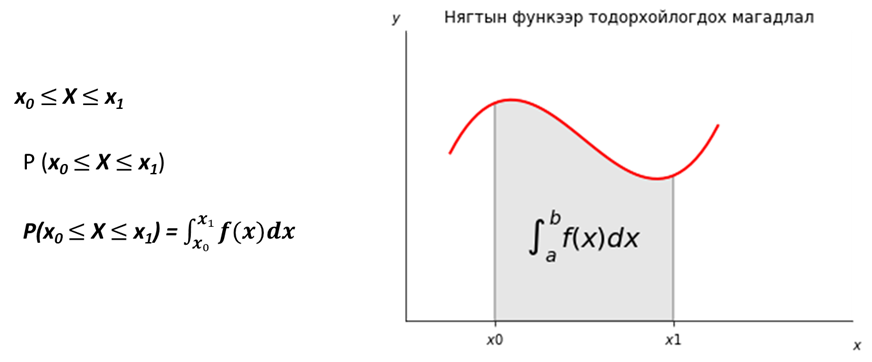

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3

'%.3f'

In [2]:
from scipy import integrate
import warnings

# integral нь warning гаргахгүй байх үүднээс scipy ын integral модел ашиглавал 
# интеграл тооцооллын үр дүнд асуудал байхгүй 
warnings.filterwarnings('ignore',
                        category=integrate.IntegrationWarning)

In [3]:
#авч болох утгын завсар [a,b]
x_range = np.array([0, 1])

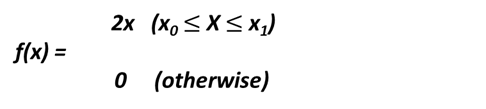

In [4]:
# нягтралын функц
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0

In [5]:
X = [x_range, f]

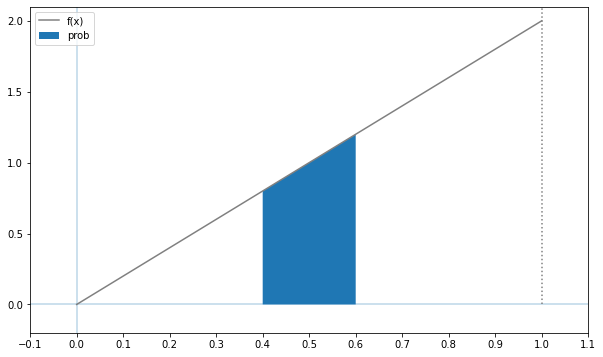

In [6]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# 0. координатыг 0.4-ээс 0.6 хүртэл бэлтгэнэ
xs = np.linspace(0.4, 0.6, 100)
# X-ийн хүрээнд f (x) ба x тэнхлэгээр хүрээлэгдсэн талбайг харанхуйл
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

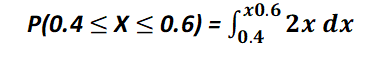

In [7]:
# Эхний аргумент нь integrate функц, хоёр ба гурав дахь аргумент нь интеграл муж юм
integrate.quad(f, 0.4, 0.6)

(0.200, 0.000)

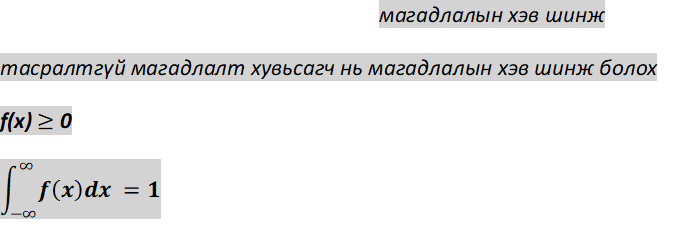

In [50]:
from scipy.optimize import minimize_scalar

# minimuze_scaler нь функцын хамгийн бага утгыг нь олно
res = minimize_scalar(f)
# Функцийн хамгийн бага утга нь fun гэж нэрлэгддэг жишээ хувьсагч дотор байдаг.
res.fun

0

In [9]:
integrate.quad(f, -np.inf, np.inf)[0]

1.000

#### 1.1.1.2 cumulative distribution function (хуримтлагдсан тархалтын функц)

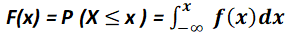

In [10]:
def F(x):
    # f - iig hasas hyzgaargvigees x hvrtel integraldana hariug gargaj ehnii elemntiig butsana
    return integrate.quad(f, -np.inf, x)[0]

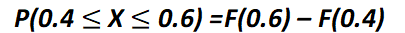

In [11]:
F(0.6) - F(0.4)

0.200

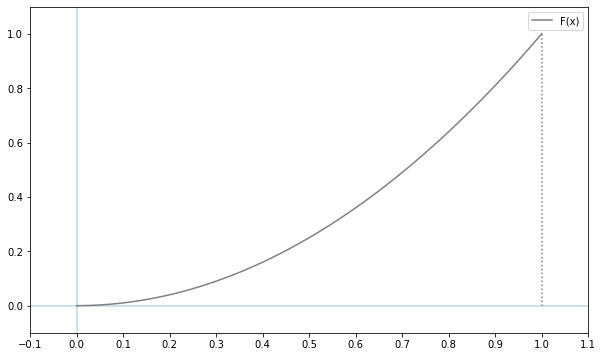

In [12]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

#### 1.1.1.3 санамсаргүй хувьсагчийн хувиргалт
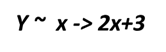
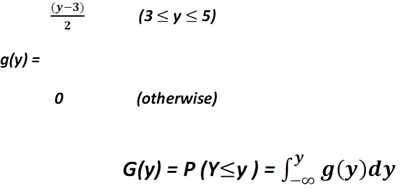

In [13]:
y_range = [3, 5]

def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y - 3) / 2
    else:
        return 0
    
def G(y):
    return integrate.quad(g, -np.inf, y)[0]

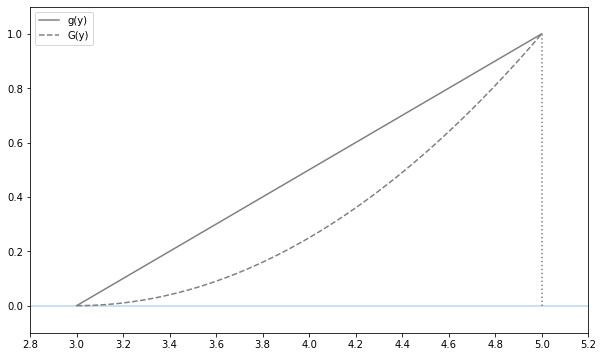

In [14]:
ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(ys, [g(y) for y in ys],
        label='g(y)', color='gray')
ax.plot(ys, [G(y) for y in ys],
        label='G(y)', ls='--', color='gray')
ax.hlines(0, 2.8, 5.2, alpha=0.3)
ax.vlines(ys.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

### 1.1.2 тасратгүй шинж чанар бүхий санамсаргүй хувьсагчийн үзүүлэлтүүд

#### 1.1.2.1 Хүлээгдэж буй утга
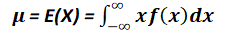

In [15]:
def integrand(x):
    return x * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]
# tasraltgvi sanamsargvi huwisagch x - iin dundaj buyu tegsh bush hondiin towtei roletiing hvleegdej bui utga 

0.667

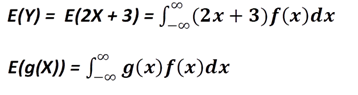

In [16]:
# expexted value functin
def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [17]:
E(X)

0.667

In [18]:
# y = 2x + 3 
E(X, g=lambda x: 2*x+3)

4.333

In [19]:
# E(2X +3) = 2E(X) 
2 * E(X) + 3

4.333

#### вариац


In [20]:
mean = E(X)
def integrand(x):
    return (x - mean) ** 2 * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

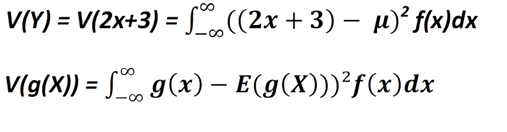

In [21]:
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [22]:
V(X)

0.056

In [23]:
#y = 2x + 3 
V(X, lambda x: 2*x + 3)

0.222

In [24]:
2**2 * V(X)

0.222

## 1.2 хоёр хэмжээст тасралтгүй санамсаргүй хувьсагч
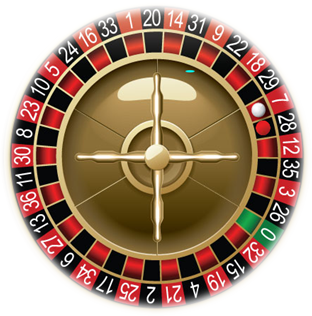

### 1.2.1 хоёр хэмжээст тасралтгүй санамсаргүй хувьсагчийн тодорхойлолт

#### joint probability density Function

f(x,y): нэгдсэн нягтралын функц x0 - оос x1 ийн хооронд y0 оос y1 - ийн хооронд утга авах 

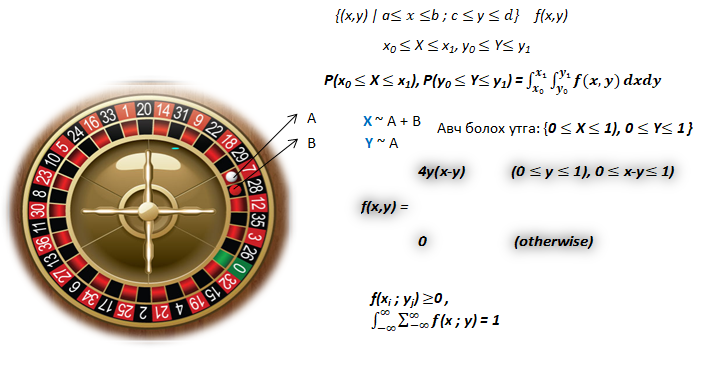

####  1.2.1.2 магадлалын хэв шинж

In [51]:
# x ,y авч болох утгууд 
x_range = [0, 2] # X ~ A + B
y_range = [0, 1] # Y ~ A

In [52]:
#нэгдсэн нягтралын функц 
def f_xy(x, y):
    if 0 <= y <= 1 and 0 <= x - y <= 1:
        return 4 * y * (x - y)
    else:
        return 0

In [53]:
XY = [x_range, y_range, f_xy]

In [28]:
xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array([[f_xy(x, y) for y in ys] for x in xs])

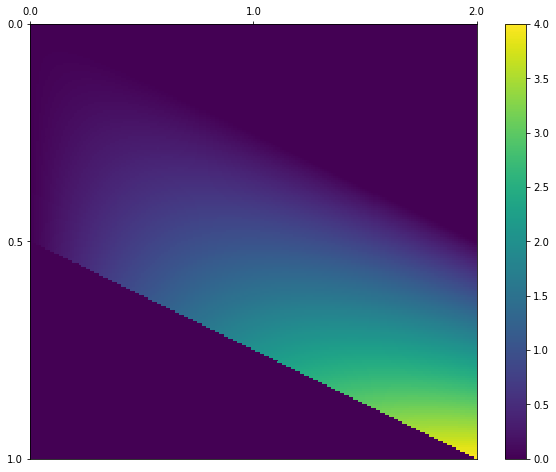

In [29]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(pd)
ax.set_xticks(np.linspace(0, 200, 3), minor=False)
ax.set_yticks(np.linspace(0, 200, 3), minor=False)
ax.set_xticklabels(np.linspace(0, 2, 3))
ax.set_yticklabels(np.linspace(0, 1, 3))
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [30]:
options={'limit':10}
integrate.nquad (f_xy,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]], opts=[options,options])[0]

0.999

#### 1.2.1.3 Мarginal probability density function
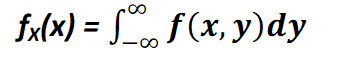

In [54]:
from functools import partial

def f_X(x):
    return integrate.quad(partial(f_xy, x), -np.inf, np.inf)[0]
def f_Y(y):
    return integrate.quad(partial(f_xy, y=y), -np.inf, np.inf)[0]

In [55]:
X = [x_range, f_X]
Y = [y_range, f_Y]

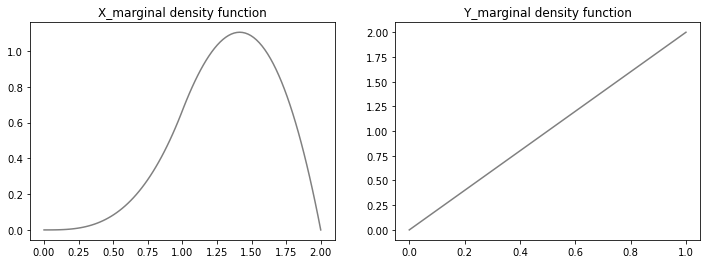

In [56]:
xs = np.linspace(*x_range, 100)
ys = np.linspace(*y_range, 100)

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(xs, [f_X(x) for x in xs], color='gray')
ax2.plot(ys, [f_Y(y) for y in ys], color='gray')
ax1.set_title('X_marginal density function')
ax2.set_title('Y_marginal density function')

plt.show()

### 1.2.2 хоёр хэмжээст тасралтгүй санамсаргүй хувьсагчийн үзүүлэлт

#### 1.2.2.1 хүлээгдэж буй утга
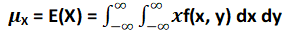

In [57]:
def integrand(x, y):
    return x * f_xy(x, y)

integrate.nquad(integrand,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]], opts=[options,options])[0]
# X iin hvleegdej bui utga

1.332

In [58]:
def E(XY, g):
    x_range, y_range, f_xy = XY
    def integrand(x, y):
        return g(x, y) * f_xy(x, y)
    
    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]], opts=[options,options])[0]

In [36]:
mean_X = E(XY, lambda x, y: x)
mean_X

1.332

In [37]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

0.666

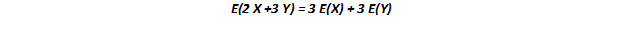

In [38]:
a, b = 2, 3

In [39]:
#E(2 X +3 Y) 
E(XY, lambda x, y: a*x + b*y)

4.661

In [40]:
#3 E(X) + 3 E(Y)
a * mean_X + b * mean_Y

4.661

#### 1.2.2.2 вариац
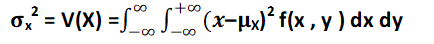

In [41]:
def integrand(x, y):
    return (x - mean_X)**2 * f_xy(x, y)

integrate.nquad(integrand,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]],opts=[options,options])[0]

0.111

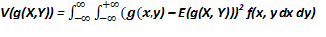

In [42]:
def V(XY, g):
    x_range, y_range, f_xy = XY
    mean = E(XY, g)
    def integrand(x, y):
        return (g(x, y) - mean)**2 * f_xy(x, y)

    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]], opts=[options,options])[0]

In [43]:
var_X = V(XY, lambda x, y: x)
var_X

0.111

In [44]:
var_Y = V(XY, lambda x, y: y)
var_Y

0.055

#### 1.2.2.3 Covariance
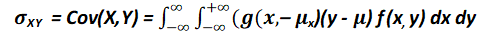

In [45]:
def Cov(XY):
    x_range, y_range, f_xy = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    def integrand(x, y):
        return (x-mean_X) * (y-mean_Y) * f_xy(x, y)

    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]], opts=[options,options])[0]

In [46]:
cov_xy = Cov(XY)
cov_xy

0.055

In [47]:
#V(2X + 3 Y) 
V(XY, lambda x, y: a*x + b*y)

1.608

In [48]:
#4V(x) + 9V(Y) + 12 Cov(X, Y) + 12 cox (X, Y ) 
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

1.608

#### 1.2.2.4 Correlation coefficient
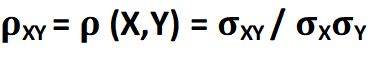

In [49]:
cov_xy / np.sqrt(var_X * var_Y)

0.7076929539686831